In [1]:
import pandas as pd
import numpy as np

In [13]:
premier =(df1["day"] > "2019-12-18")

In [11]:
df1.dtypes

callsign         object
number           object
icao24           object
registration     object
typecode         object
origin           object
destination      object
firstseen        object
lastseen         object
day              object
latitude_1      float64
longitude_1     float64
altitude_1      float64
latitude_2      float64
longitude_2     float64
altitude_2      float64
dtype: object

In [16]:
covid_new = df1_new.append(df2, ignore_index=True)

In [20]:
covid_new.drop(["callsign","number", "icao24" ,"registration", "typecode"], axis = 1, inplace = True )

In [22]:
# Origin par China  et filtrer ( ZUCK, ZGSZ)
# destination, find china and remove / 
# drop china na destination 

In [23]:
covid_new.replace(to_replace =["VHHH", "ZGGG", "VMMC", "ZGOW", "ZGSD", "ZGSZ", "ZSAM", "ZSWZ", "ZUCK", "ZYHE"], 
                            value ="CHINA", inplace = True)

In [25]:
covid_new.to_csv(r'C:\Users\UTILISATEUR\Desktop\Borel\C2.csv', index = False)

In [26]:
# drop les valeurs qui ne sont pas chine dans la colonnes origin
cond = covid_new["origin"] != 'CHINA'
covid_new.drop(covid_new[cond].index, inplace = True)

In [27]:
covid_new.shape #a ce stade nous avons 68915 partant de la chine vers d'autre pays 

(68915, 5)

In [28]:
# drop china dans destination

In [29]:
cond2 = covid_new["destination"] == 'CHINA'
covid_new.drop(covid_new[cond2].index, inplace = True)

In [31]:
# clean missing and NAN values 
# change Day type 
# destination par kombo
# Merge Covid ( confirm case) file a partir ya country na date 


In [32]:
# clean missing and NAN values 
covid_new.dropna(axis=0, inplace=True)
# change Day type 

In [36]:
# after cleaning the remaining rows is 29021

In [37]:
# creation des valeurs uniques pour tirer les origines et destinations
df_ac = pd.DataFrame(list(set().union(covid_new.origin.unique(), covid_new.destination.unique())))

In [38]:
# Creation des valeurs uniques des destinations
df_ab = pd.DataFrame(list(covid_new.destination.unique()))

In [2]:
# tout commence ici
covid_19 =  pd.read_csv("/home/jbl/Documents/livre unil/Project SOAR/COVID-19-global-data.csv")
covid_19.tail() #covid record start from 22 Janv 2020

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
181995,2021-10-28,Zimbabwe,NaN,132880,0.0,4675
181996,2021-10-29,Zimbabwe,NaN,132926,0.0,4675
181997,2021-10-30,Zimbabwe,NaN,132926,0.0,4675
181998,2021-10-31,Zimbabwe,NaN,132977,0.0,4678
181999,2021-11-01,Zimbabwe,NaN,133007,0.0,4679


In [14]:
covid_19.shape

(182000, 6)

In [3]:
covid_19['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [11]:
# Germany number of cases by 15/03/20 => germany is a country; country -> is a column;
# so there is a need for a condition  
# confirmed cases is also a column (it is cumulative sum); =>  
covid_19[(covid_19['Country/Region'] == 'Germany') & (covid_19['Date'] == '2020-03-15')]

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
87153,2020-03-15,Germany,NaN,5795,46.0,11


In [32]:
# we need to limit the date to 15th March 2020
# let's make a condition for that 
# and then remove all the records whose dates are beyond 

In [12]:
noLockdown = covid_19['Date'] < "2020-03-16"
covid_19_noLockdown = covid_19[noLockdown]
covid_19_noLockdown.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
181399,2020-03-11,Zimbabwe,NaN,0,0.0,0
181400,2020-03-12,Zimbabwe,NaN,0,0.0,0
181401,2020-03-13,Zimbabwe,NaN,0,0.0,0
181402,2020-03-14,Zimbabwe,NaN,0,0.0,0
181403,2020-03-15,Zimbabwe,NaN,0,0.0,0


In [13]:
covid_19_noLockdown.shape #15 K records upto 15 March 20

(15120, 6)

In [14]:
covid_19_noLockdown[(covid_19_noLockdown['Country/Region'] == 'Germany') & (covid_19_noLockdown['Date'] == '2020-03-15')]

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
87153,2020-03-15,Germany,NaN,5795,46.0,11


In [15]:
covid_19_noLockdown.dtypes #date format a changer et uniformiser les deux dataframes  / province à drop / 

Date               object
Country/Region     object
Province/State     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [16]:
covid_19['Date'] = pd.to_datetime(covid_19['Date'], infer_datetime_format=True)
covid_19['Date'].head() #Date formatted 

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [17]:
# Air traffic loading
air_traffic = pd.read_csv("/home/jbl/Documents/livre unil/Project SOAR/Air.csv")

In [18]:
air_traffic.tail() #let's limit to 15 March

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic
29017,China,Hungary,3/29/2020 16:07,3/30/2020 5:51,3/30/2020 2:00
29018,China,Sri Lanka,3/30/2020 3:30,3/30/2020 8:17,3/30/2020 2:00
29019,China,Turkey,3/30/2020 6:33,3/30/2020 16:58,3/30/2020 2:00
29020,China,Bahrain,3/30/2020 23:53,3/31/2020 8:29,3/31/2020 2:00
29021,China,Czech Republic,3/31/2020 0:13,3/31/2020 18:34,3/31/2020 2:00


In [19]:
air_traffic.shape

(29022, 5)

In [20]:
noLockdown = air_traffic['Date Air_traffic'] < "3/16/2020"
air_traffic_noLockdown = air_traffic[noLockdown]
air_traffic_noLockdown.tail()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic
28978,China,Austria,3/14/2020 2:33,3/14/2020 15:57,3/14/2020 1:00
28979,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,3/14/2020 1:00
28980,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,3/14/2020 1:00
28981,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,3/15/2020 1:00
28982,China,Bahrain,3/14/2020 23:19,3/15/2020 8:02,3/15/2020 1:00


In [21]:
air_traffic_noLockdown.shape #24 k flights

(25459, 5)

In [22]:
air_traffic_noLockdown.dtypes

Origin              object
Country/Region      object
Firstseen           object
Lastseen            object
Date Air_traffic    object
dtype: object

In [23]:
air_traffic_noLockdown['Date Air_traffic'] = pd.to_datetime(air_traffic_noLockdown['Date Air_traffic'], infer_datetime_format=True)

<ipython-input-23-821f615b5315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date Air_traffic'] = pd.to_datetime(air_traffic_noLockdown['Date Air_traffic'], infer_datetime_format=True)


In [24]:
air_traffic_noLockdown['Date'] = air_traffic_noLockdown['Date Air_traffic'].dt.date
air_traffic_noLockdown['Date'].tail()

<ipython-input-24-86932f970f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date'] = air_traffic_noLockdown['Date Air_traffic'].dt.date


28978    2020-03-14
28979    2020-03-14
28980    2020-03-14
28981    2020-03-15
28982    2020-03-15
Name: Date, dtype: object

In [25]:
air_traffic_noLockdown[['Date','Date Air_traffic']].head()

,Date,Date Air_traffic
0,2019-12-20,2019-12-20 01:00:00
1,2019-12-20,2019-12-20 01:00:00
2,2019-12-20,2019-12-20 01:00:00
3,2019-12-20,2019-12-20 01:00:00
4,2019-12-20,2019-12-20 01:00:00


In [24]:
air_copy = air_traffic_noLockdown.copy()

In [26]:
air_traffic_noLockdown['Date'] = pd.to_datetime(air_traffic_noLockdown['Date'], infer_datetime_format=True)
air_traffic_noLockdown['Date'].tail()

<ipython-input-26-97322caae21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date'] = pd.to_datetime(air_traffic_noLockdown['Date'], infer_datetime_format=True)


28978   2020-03-14
28979   2020-03-14
28980   2020-03-14
28981   2020-03-15
28982   2020-03-15
Name: Date, dtype: datetime64[ns]

In [27]:
# let's drop province
covid_19_noLockdown = covid_19_noLockdown.drop(['Province/State'], inplace = False, axis=1)
covid_19_noLockdown.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


In [28]:
covid_19_noLockdown.tail()

,Date,Country/Region,Confirmed,Recovered,Deaths
181399,2020-03-11,Zimbabwe,0,0.0,0
181400,2020-03-12,Zimbabwe,0,0.0,0
181401,2020-03-13,Zimbabwe,0,0.0,0
181402,2020-03-14,Zimbabwe,0,0.0,0
181403,2020-03-15,Zimbabwe,0,0.0,0


In [29]:
covid_19_noLockdown.shape

(15120, 5)

In [30]:
covid_19_noLockdown.dtypes

Date               object
Country/Region     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [31]:
covid_19_noLockdown['Date'].head(1)

0    2020-01-22
Name: Date, dtype: object

In [32]:
air_traffic_noLockdown['Date'].head(1)

0   2019-12-20
Name: Date, dtype: datetime64[ns]

In [33]:
covid_19_noLockdown['Date'] = pd.to_datetime(covid_19_noLockdown['Date'], infer_datetime_format=True)
covid_19_noLockdown['Date'].tail(1)

181403   2020-03-15
Name: Date, dtype: datetime64[ns]

In [30]:
covid_19 = covid_19_noLockdown.copy()

In [35]:
air_traffic_noLockdown.dtypes #datetime64[ns]

Origin                      object
Country/Region              object
Firstseen                   object
Lastseen                    object
Date Air_traffic    datetime64[ns]
Date                datetime64[ns]
dtype: object

In [35]:
#merged_df = left_df.merge(right_df, 

covid_alpha = air_traffic_noLockdown.merge(covid_19_noLockdown, how = 'left', left_on=['Country/Region','Date'], right_on=['Country/Region','Date'])
covid_alpha.head()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
0,China,Taiwan,12/20/2019 0:43,12/20/2019 1:50,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
1,China,Taiwan,12/20/2019 1:02,12/20/2019 2:29,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
2,China,Taiwan,12/20/2019 1:26,12/20/2019 2:33,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
3,China,Taiwan,12/20/2019 1:46,12/20/2019 2:55,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
4,China,Taiwan,12/20/2019 2:05,12/20/2019 3:11,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN


In [34]:
covid_alpha_1_new = air_traffic_noLockdown.merge(covid_19_noLockdown, how = 'inner', left_on=['Country/Region','Date'], right_on=['Country/Region','Date'])
covid_alpha_1_new.head()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
0,China,Thailand,1/22/2020 1:06,1/22/2020 3:40,2020-01-22 01:00:00,2020-01-22,4,2.0,0
1,China,Thailand,1/22/2020 1:07,1/22/2020 3:44,2020-01-22 01:00:00,2020-01-22,4,2.0,0
2,China,Thailand,1/22/2020 1:26,1/22/2020 4:13,2020-01-22 01:00:00,2020-01-22,4,2.0,0
3,China,Thailand,1/22/2020 2:30,1/22/2020 5:10,2020-01-22 01:00:00,2020-01-22,4,2.0,0
4,China,Thailand,1/22/2020 2:50,1/22/2020 5:19,2020-01-22 01:00:00,2020-01-22,4,2.0,0


In [57]:
covid_alpha_2_new = air_traffic_noLockdown.merge(covid_19_noLockdown, how = 'outer', left_on=['Country/Region','Date'], right_on=['Country/Region','Date'])
covid_alpha_2_new.head()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
0,China,Taiwan,12/20/2019 0:43,12/20/2019 1:50,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
1,China,Taiwan,12/20/2019 1:02,12/20/2019 2:29,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
2,China,Taiwan,12/20/2019 1:26,12/20/2019 2:33,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
3,China,Taiwan,12/20/2019 1:46,12/20/2019 2:55,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
4,China,Taiwan,12/20/2019 2:05,12/20/2019 3:11,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN


In [37]:
covid_alpha.tail()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
38815,China,Austria,3/14/2020 2:33,3/14/2020 15:57,2020-03-14 01:00:00,2020-03-14,655.0,6.0,1.0
38816,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,2020-03-14 01:00:00,2020-03-14,5.0,0.0,0.0
38817,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,2020-03-14 01:00:00,2020-03-14,10.0,1.0,0.0
38818,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,2020-03-15 01:00:00,2020-03-15,214.0,60.0,0.0
38819,China,Bahrain,3/14/2020 23:19,3/15/2020 8:02,2020-03-15 01:00:00,2020-03-15,214.0,60.0,0.0


In [36]:
covid_alpha_1_new.tail()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
20471,China,Austria,3/14/2020 2:33,3/14/2020 15:57,2020-03-14 01:00:00,2020-03-14,655,6.0,1
20472,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,2020-03-14 01:00:00,2020-03-14,5,0.0,0
20473,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,2020-03-14 01:00:00,2020-03-14,10,1.0,0
20474,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,2020-03-15 01:00:00,2020-03-15,214,60.0,0
20475,China,Bahrain,3/14/2020 23:19,3/15/2020 8:02,2020-03-15 01:00:00,2020-03-15,214,60.0,0


In [64]:
covid_alpha_2_new.head(50)

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
0,China,Taiwan,12/20/2019 0:43,12/20/2019 1:50,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
1,China,Taiwan,12/20/2019 1:02,12/20/2019 2:29,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
2,China,Taiwan,12/20/2019 1:26,12/20/2019 2:33,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
3,China,Taiwan,12/20/2019 1:46,12/20/2019 2:55,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
4,China,Taiwan,12/20/2019 2:05,12/20/2019 3:11,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
5,China,Taiwan,12/20/2019 2:11,12/20/2019 8:52,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
6,China,Taiwan,12/20/2019 2:37,12/20/2019 3:46,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
7,China,Taiwan,12/20/2019 2:38,12/20/2019 3:50,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
8,China,Taiwan,12/20/2019 2:40,12/20/2019 3:54,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
9,China,Taiwan,12/20/2019 3:19,12/20/2019 4:27,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN


In [56]:
covid_alpha_1_new[(covid_alpha_1_new['Country/Region'] == 'Italy') & (covid_alpha_1_new['Date'] <= '2020-03-15')]

,Origin,Country/Region,Firstseen,Lastseen,Date,Confirmed,Recovered,Deaths
20249,China,Italy,1/22/2020 18:06,1/23/2020 6:22,2020-01-23,0,0.0,0
20250,China,Italy,1/22/2020 18:40,1/23/2020 7:06,2020-01-23,0,0.0,0
20251,China,Italy,1/23/2020 17:45,1/24/2020 6:24,2020-01-24,0,0.0,0
20252,China,Italy,1/23/2020 18:18,1/24/2020 6:35,2020-01-24,0,0.0,0
20253,China,Italy,1/24/2020 18:14,1/25/2020 6:49,2020-01-25,0,0.0,0
20254,China,Italy,1/24/2020 18:49,1/25/2020 7:01,2020-01-25,0,0.0,0
20255,China,Italy,1/26/2020 17:30,1/27/2020 6:10,2020-01-27,0,0.0,0
20256,China,Italy,1/26/2020 18:14,1/27/2020 6:42,2020-01-27,0,0.0,0
20257,China,Italy,1/27/2020 18:15,1/28/2020 6:57,2020-01-28,0,0.0,0
20258,China,Italy,1/28/2020 17:32,1/29/2020 7:00,2020-01-29,0,0.0,0


In [46]:
covid_alpha.shape

(38820, 10)

In [37]:
covid_alpha_1_new.shape

(20476, 9)

In [38]:
covid_alpha.isnull().sum()

Origin                  0
Country/Region       1887
Firstseen               0
Lastseen                0
Date Air_traffic        0
Date                    0
Confirmed           18344
Recovered           22200
Deaths              18344
dtype: int64

In [39]:
covid_alpha.drop(["Date Air_traffic"], axis = 1, inplace = True )


In [42]:
covid_alpha_1_new.drop(["Date Air_traffic"], axis = 1, inplace = True )

In [43]:
covid_alpha_1_new

,Origin,Country/Region,Firstseen,Lastseen,Date,Confirmed,Recovered,Deaths
0,China,Thailand,1/22/2020 1:06,1/22/2020 3:40,2020-01-22,4,2.0,0
1,China,Thailand,1/22/2020 1:07,1/22/2020 3:44,2020-01-22,4,2.0,0
2,China,Thailand,1/22/2020 1:26,1/22/2020 4:13,2020-01-22,4,2.0,0
3,China,Thailand,1/22/2020 2:30,1/22/2020 5:10,2020-01-22,4,2.0,0
4,China,Thailand,1/22/2020 2:50,1/22/2020 5:19,2020-01-22,4,2.0,0
...,...,...,...,...,...,...,...,...
20471,China,Austria,3/14/2020 2:33,3/14/2020 15:57,2020-03-14,655,6.0,1
20472,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,2020-03-14,5,0.0,0
20473,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,2020-03-14,10,1.0,0
20474,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,2020-03-15,214,60.0,0


In [ ]:
# find out the real number of cases in the 50 countries which have been in relation with China through Air traffic


In [ ]:
# find out 10 countries having the highest flight rate with China. 


In [ ]:
#Prophet Algo

In [39]:
%matplotlib inline


# Prophet FB

In [2]:
conda install -c conda-forge prophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jbl/anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.4               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    binutils_impl_linux-64-2.33.1|       he1b5a44_7         8.6 MB  conda-forge
    binutils_linux-64-2.33.1   |      h9595d00_17          21 KB  conda-forge
    cftime-1.3.0               |   py38h0b5ebd8_0         310 KB  conda-forge
    conda-4.11.0               | 

In [40]:
from prophet import Prophet

In [41]:
from prophet.plot import add_changepoints_to_plot

In [4]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 4.2 MB/s eta 0:00:01    |▉                               | 665 kB 1.9 MB/s eta 0:00:13     |█████████▌                      | 7.5 MB 3.9 MB/s eta 0:00:05     |███████████████████████▎        | 18.4 MB 3.4 MB/s eta 0:00:03


In [9]:
print('Prophet %s' % Prophet) 

Prophet <class 'prophet.forecaster.Prophet'>


In [41]:
covid_alpha.columns

Index(['Origin', 'Country/Region', 'Firstseen', 'Lastseen', 'Date',
       'Confirmed', 'Recovered', 'Deaths'],
      dtype='object')

In [4]:
covid_alpha_cleaned = pd.read_csv("/home/jbl/Documents/livre unil/Project SOAR/cvd_1.csv")

In [8]:
covid_alpha_cleaned.dtypes

Origin            object
Country/Region    object
Firstseen         object
Lastseen          object
Date              object
Confirmed          int64
Recovered          int64
Deaths             int64
dtype: object

In [10]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(covid_alpha_cleaned['Date'])
df['y'] = covid_alpha_cleaned['Confirmed']

df.tail()

,ds,y
36928,2020-02-24,160
36929,2020-02-24,160
36930,2020-02-24,160
36931,2020-02-24,160
36932,2020-02-24,160


In [43]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(covid_alpha['Date'])
df['y'] = covid_alpha['Confirmed']

df.tail()

,ds,y
38815,2020-03-14,655.0
38816,2020-03-14,5.0
38817,2020-03-14,10.0
38818,2020-03-15,214.0
38819,2020-03-15,214.0


In [45]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Date')

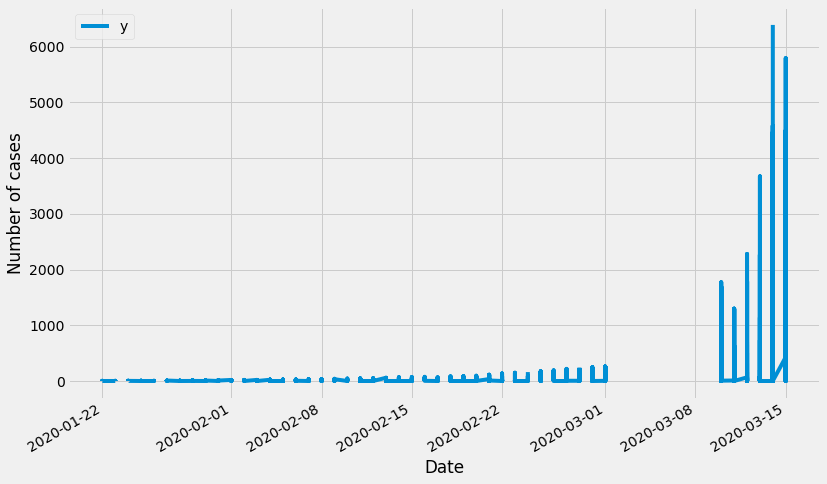

In [47]:
plt.style.use('fivethirtyeight')
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Number of cases')#('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')


In [ ]:
# we need to ask the dataset questions like what are the countries which have more number of flights with China
# then to predict that they will have more cases. finally, to verify that claim

In [58]:
#Step 3 — Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
prophet = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality=False, daily_seasonality=True, weekly_seasonality=True, interval_width=0.95)
prophet.fit(df)
future_dates = prophet.make_future_dataframe(periods=75, freq='d')
future_dates.tail()

,ds
151,2020-05-25
152,2020-05-26
153,2020-05-27
154,2020-05-28
155,2020-05-29


In [59]:
forecast = prophet.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2020-05-25,835.794658,136.981393,1493.303717
152,2020-05-26,616.864752,50.821198,1161.377388
153,2020-05-27,871.290851,126.685919,1583.524109
154,2020-05-28,671.074957,90.520125,1280.361966
155,2020-05-29,884.328040,137.034952,1624.453177


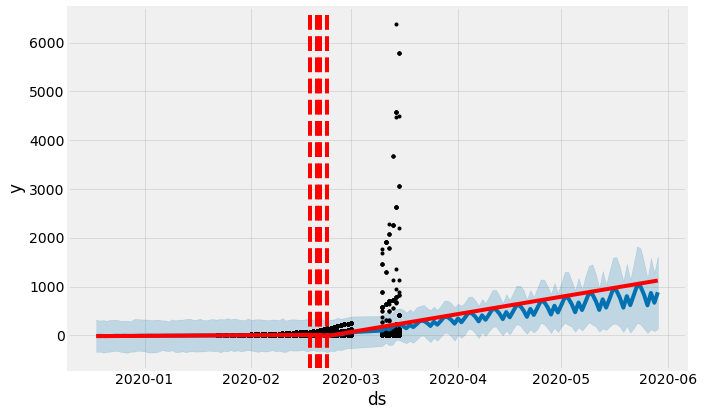

In [62]:
#future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
#forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()

Prophet has included the original data as the black dots and the blue line is the forecast model. The light blue area is the confidence interval. Using the add_changepoints_to_plot function added the red lines; the vertical dashed lines are changepoints Prophet identified where the trend changed, and the solid red line is the trend with all seasonality removed. 

In [ ]:
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)


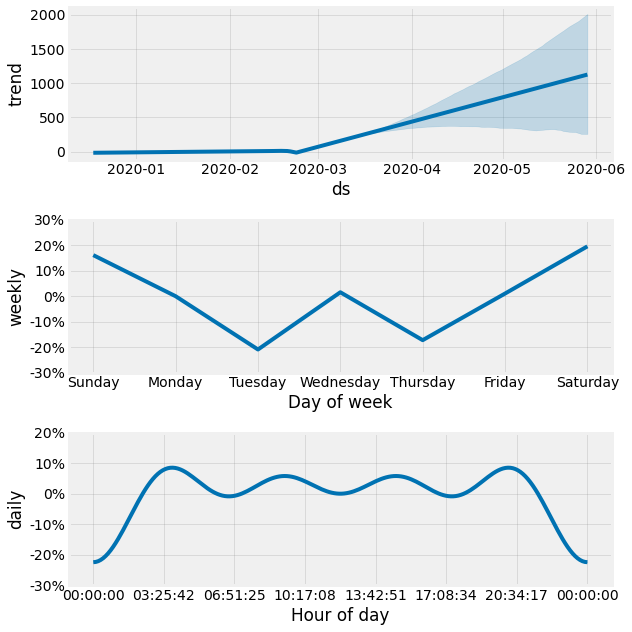

In [63]:
#a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
#plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [ ]:
# 1. premierement:
# la visualisation en amont nous permet de voir: Transmission of coronavirus from China to other countries mainly occurred during the month of February-March of 2020 
# we need to show that month wise progress of covid 19 cases through a choropleth graph (or another)
# so as to visualise how everything started from China

# 2. apres le claim est que Air traffic is the main factor 

# 3. pour faire cette analyse, on a besoin premierement de comprendre comment covid se comporte (se propage) 
# grace au regressor principal qu'est la date et au nombre des cas qui lui a ete renseignE, 
# Prophet arrive A comprendre la propagation de covid
# et en meme temps, on peut analyser cmnt Air traffic a ete le facteur dans cette propagation 
# en se servant des dates de flights entre China et ces pays
# that's why on a merge les datasets: covid et air traffic autour des colonnes "date"

# try all countries air traffic with Prophet without forcing China/India as origin. let the origin be anywhere **
# With Prophet, let's not put origin. We'll filter the air traffic dataset from 19/12/19 to 15/12/20 
# and sample it in order to fit the covid dataset, then we'll clean it and finally run prophet    

# on compare enfin avec les figures reels:  **
# to achieve the above we need to get unique countries (from country column)
# that is those countries which had transaction with China in that period
# and to compare the predicted number of cases agaisnt the real ones which those countries had between April and May

# find out the real number of cases in the 50 countries which have been in relation with China through Air traffic
# and compare them with the number of cases which Prophet has predicted approx 2 M **

# find out 10 countries having the highest flight rate with China. ***
# pour chacun de ces pays, il faudra run Prophet et ensuite comparer avec leurs reels data

# check the 10 or 20 last countries with the least flights with China… and see/compare whether the number of cases is really low. 



In [ ]:
my_model.plot(forecast,
my_model.plot_components(forec
Adding Multiple Regressors
train_dataset[‘type’] = X[‘type’]
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);


In [ ]:
# NN is for air traffic investigation over all  
# which are directly connected to China that doesn’t capture the full picture … Since NN uses weightage, 
# it might be able to really show how Air traffic was a factor without needing to hard code the originated country.  With Prophet, we actually study how China/india through air traffic have affected other places 
